In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Cleaning Data and combining health expenditure and stringency index

In [ ]:
clean_cd_df = pd.read_csv("/content/drive/MyDrive/DA_Project_files/All_datasets/Covidistress_final.csv")
health_expend_df = pd.read_csv("/content/drive/MyDrive/DA_Project_files/All_datasets/Healthcare_expenditure.csv")
string_ind_df = pd.read_csv("/content/drive/MyDrive/DA_Project_files/All_datasets/covid-stringency-index.csv")


In [ ]:
clean_cd_df.columns

Index(['Unnamed: 0', 'Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom',
       'Dem_employment', 'Country', 'Dem_Expat', 'Dem_state',
       'Dem_maritalstatus', 'Dem_dependents', 'Dem_riskgroup', 'Dem_isolation',
       'Dem_isolation_adults', 'Dem_isolation_kids', 'AD_gain', 'AD_loss',
       'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3',
       'Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6',
       'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8', 'Scale_PSS10_UCLA_9',
       'Scale_PSS10_UCLA_10', 'Scale_SLON_1', 'Scale_SLON_2', 'Scale_SLON_3',
       'OECD_people_1', 'OECD_people_2', 'OECD_insititutions_1',
       'OECD_insititutions_2', 'OECD_insititutions_3', 'OECD_insititutions_4',
       'OECD_insititutions_5', 'OECD_insititutions_6', 'Corona_concerns_1',
       'Corona_concerns_2', 'Corona_concerns_3', 'Corona_concerns_4',
       'Corona_concerns_5', 'Trust_countrymeasure', 'Compliance_1',
       'Compliance_2', 'Compliance_3', 'Compliance_4', '

In [ ]:
clean_cd_df.head()

,Unnamed: 0,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6
0,0,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Tucumán,Single,0.0,Yes,Isolated,4,0,0.0,0.0,5,2,5,4,4,1,3,5,3,5,2,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,<U+0622><U+0632><U+0627><U+062F> <U+06A9><U+06...,Single,0.0,Yes,Life carries on with minor changes,0,0,0.0,0.0,3,3,1,5,2,3,4,4,2,1,3,1,3,3,10,5,4,4,2,4,5,1,2,4,4,5,5,6,3,3,2,4,2,2.200000,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0
2,2,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,Argentina,no,Córdoba,Single,0.0,No,Isolated,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Lovech,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1,0,0.0,0.0,3,5,3,3,3,5,2,3,3,4,5,3,4,4,8,0,5,2,4,0,2,3,0,0,0,0,5,3,5,5,2,2,4,3.600000,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0
4,4,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Mendoza,Married/cohabiting,0.0,Yes,Isolated,1,0,0.0,0.0,3,3,2,0,3,0,5,2,0,3,1,1,0,8,8,9,8,5,9,6,9,4,4,3,6,0,5,6,6,0,4,5,5,2.714286,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0


In [ ]:
clean_cd_df['avg_stress'] = (clean_cd_df['Scale_PSS10_UCLA_1']+ clean_cd_df['Scale_PSS10_UCLA_1']+clean_cd_df['Scale_PSS10_UCLA_2']+clean_cd_df['Scale_PSS10_UCLA_3']+clean_cd_df['Scale_PSS10_UCLA_4']+clean_cd_df['Scale_PSS10_UCLA_5']+clean_cd_df['Scale_PSS10_UCLA_6']+clean_cd_df['Scale_PSS10_UCLA_7']+clean_cd_df['Scale_PSS10_UCLA_8']+clean_cd_df['Scale_PSS10_UCLA_9']+clean_cd_df['Scale_PSS10_UCLA_10'])/10

In [ ]:
clean_cd_df.head()

,Unnamed: 0,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,avg_stress
0,0,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Tucumán,Single,0.0,Yes,Isolated,4,0,0.0,0.0,5,2,5,4,4,1,3,5,3,5,2,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2
1,1,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,<U+0622><U+0632><U+0627><U+062F> <U+06A9><U+06...,Single,0.0,Yes,Life carries on with minor changes,0,0,0.0,0.0,3,3,1,5,2,3,4,4,2,1,3,1,3,3,10,5,4,4,2,4,5,1,2,4,4,5,5,6,3,3,2,4,2,2.200000,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,3.1
2,2,47,Female,"Some College, short continuing education or eq...",Some College or equivalent,Self-employed,Argentina,no,Córdoba,Single,0.0,No,Isolated,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Lovech,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1,0,0.0,0.0,3,5,3,3,3,5,2,3,3,4,5,3,4,4,8,0,5,2,4,0,2,3,0,0,0,0,5,3,5,5,2,2,4,3.600000,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0,3.7
4,4,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Mendoza,Married/cohabiting,0.0,Yes,Isolated,1,0,0.0,0.0,3,3,2,0,3,0,5,2,0,3,1,1,0,8,8,9,8,5,9,6,9,4,4,3,6,0,5,6,6,0,4,5,5,2.714286,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0,2.4


In [ ]:
#deleting rows with zero stress 
clean_cd_df.shape

(125306, 74)

In [ ]:
clean_cd_df = clean_cd_df.loc[clean_cd_df['avg_stress'] != 0]

In [ ]:
type(health_expend_df)

pandas.core.frame.DataFrame

In [ ]:
health_expend_df = health_expend_df.drop(health_expend_df.index[0])

In [ ]:
health_expend_df = health_expend_df.drop(labels = ['Unnamed: 1','Unnamed: 2', 'Unnamed: 3'] , axis = 1)

In [ ]:
health_expend_df.fillna(0)

,Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Australia,68.6,69.2,67.5,65.0,64.7,65.8,66.0,66.3,66.6,68.7,..
2,Austria,74.6,74.6,74.7,74.0,74.0,74.1,74.0,74.0,74.8,75.2,76.4
3,Belgium,76.1,76.1,76.6,76.1,76.4,75.9,77.3,77.4,76.9,76.8,..
4,Canada,69.9,70.2,70.4,70.7,70.6,70.6,69.7,69.8,70.2,70.2,..
5,Chile,59.0,59.5,60.0,59.4,58.9,58.7,58.5,60.1,60.3,60.6,62.8
6,Colombia,74.8,76.0,73.9,75.6,76.2,76.3,76.1,76.6,77.3,77.5,..
7,Costa Rica,73.1,73.0,74.1,74.9,73.0,74.8,75.1,75.0,73.8,73.9,..
8,Czech Republic,83.3,83.9,83.7,83.6,82.7,82.4,82.0,82.1,83.0,81.8,..
9,Denmark,83.9,83.6,84.0,84.3,84.2,84.2,84.1,84.0,83.9,83.3,..
10,Estonia,76.3,76.7,76.7,75.6,75.7,75.6,75.7,73.6,73.7,74.5,78.2


In [ ]:
health_expend_df = health_expend_df.replace('..', int(0))

In [ ]:
health_expend_df  = health_expend_df.astype({'2019':'float64'})

In [ ]:
health_expend_new_df = pd.DataFrame()
health_expend_new_df['Country'] = health_expend_df['Year']

health_expend_new_df['Avg_10-19'] = health_expend_df.mean(axis = 1)

In [ ]:
health_expend_new_df.head()

,Country,Avg_10-19
1,Australia,66.84
2,Austria,74.40
3,Belgium,76.56
4,Canada,70.23
5,Chile,59.50


In [ ]:
combined_new_df = pd.DataFrame()
combined_new_df = pd.merge(left = clean_cd_df, right = health_expend_new_df, how = 'left', left_on = 'Country', right_on = 'Country')

In [ ]:
combined_new_df.head()

,Unnamed: 0,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_state,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,avg_stress,Avg_10-19
0,0,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Tucumán,Single,0.0,Yes,Isolated,4,0,0.0,0.0,5,2,5,4,4,1,3,5,3,5,2,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN
1,1,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,<U+0622><U+0632><U+0627><U+062F> <U+06A9><U+06...,Single,0.0,Yes,Life carries on with minor changes,0,0,0.0,0.0,3,3,1,5,2,3,4,4,2,1,3,1,3,3,10,5,4,4,2,4,5,1,2,4,4,5,5,6,3,3,2,4,2,2.200000,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,3.1,NaN
2,3,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Lovech,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1,0,0.0,0.0,3,5,3,3,3,5,2,3,3,4,5,3,4,4,8,0,5,2,4,0,2,3,0,0,0,0,5,3,5,5,2,2,4,3.600000,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0,3.7,NaN
3,4,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Mendoza,Married/cohabiting,0.0,Yes,Isolated,1,0,0.0,0.0,3,3,2,0,3,0,5,2,0,3,1,1,0,8,8,9,8,5,9,6,9,4,4,3,6,0,5,6,6,0,4,5,5,2.714286,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0,2.4,NaN
4,5,68,Male,"College degree, bachelor, master",College degree,Retired,Italy,no,liguria,Married/cohabiting,0.0,No,Life carries on with minor changes,1,0,0.0,0.0,1,2,3,4,4,2,4,4,2,3,2,2,3,7,7,7,7,8,8,7,8,5,5,5,5,5,5,5,5,5,4,4,1,2.100000,5.0,3.0,5.0,3.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,75.28


In [ ]:
string_ind_df.head()

,Entity,Code,Day,stringency_index
0,Afghanistan,AFG,2020-01-21,0.0
1,Afghanistan,AFG,2020-01-22,0.0
2,Afghanistan,AFG,2020-01-23,0.0
3,Afghanistan,AFG,2020-01-24,0.0
4,Afghanistan,AFG,2020-01-25,0.0


In [ ]:
string_ind_df["Day"]=pd.to_datetime(string_ind_df["Day"])

In [ ]:
string_ind_df=string_ind_df[(pd.DatetimeIndex(string_ind_df["Day"]).year==2020)&(pd.DatetimeIndex(string_ind_df["Day"]).month<6)]

In [ ]:
string_ind_df = string_ind_df.groupby("Entity")["stringency_index"].mean()

In [ ]:
combined_new_df = pd.merge(left = combined_new_df, right = string_ind_df, how = 'left', left_on= 'Country', right_on = 'Entity')

In [ ]:
display(string_ind_df)

Entity
Afghanistan    48.169394
Albania        54.761591
Algeria        46.600758
Andorra        29.117879
Angola         45.075682
                 ...    
Venezuela      50.899470
Vietnam        59.164015
Yemen          34.889545
Zambia         31.514242
Zimbabwe       49.415303
Name: stringency_index, Length: 185, dtype: float64

In [ ]:
combined_new_df = combined_new_df.drop('Dem_state', axis = 1)

In [ ]:
combined_new_df

,Unnamed: 0,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,AD_gain,AD_loss,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_4,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,avg_stress,Avg_10-19,stringency_index
0,0,29,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Single,0.0,Yes,Isolated,4,0,0.0,0.0,5,2,5,4,4,1,3,5,3,5,2,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN,58.915227
1,1,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,Single,0.0,Yes,Life carries on with minor changes,0,0,0.0,0.0,3,3,1,5,2,3,4,4,2,1,3,1,3,3,10,5,4,4,2,4,5,1,2,4,4,5,5,6,3,3,2,4,2,2.200000,4.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,3.1,NaN,56.985985
2,3,79,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Divorced/widowed,0.0,Yes,Life carries on with minor changes,1,0,0.0,0.0,3,5,3,3,3,5,2,3,3,4,5,3,4,4,8,0,5,2,4,0,2,3,0,0,0,0,5,3,5,5,2,2,4,3.600000,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,2.0,5.0,5.0,2.0,5.0,4.0,3.7,NaN,43.891288
3,4,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Married/cohabiting,0.0,Yes,Isolated,1,0,0.0,0.0,3,3,2,0,3,0,5,2,0,3,1,1,0,8,8,9,8,5,9,6,9,4,4,3,6,0,5,6,6,0,4,5,5,2.714286,6.0,NaN,6.0,2.0,6.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,3.0,5.0,5.0,6.0,2.0,2.0,6.0,2.4,NaN,58.915227
4,5,68,Male,"College degree, bachelor, master",College degree,Retired,Italy,no,Married/cohabiting,0.0,No,Life carries on with minor changes,1,0,0.0,0.0,1,2,3,4,4,2,4,4,2,3,2,2,3,7,7,7,7,8,8,7,8,5,5,5,5,5,5,5,5,5,4,4,1,2.100000,5.0,3.0,5.0,3.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,75.28,64.064394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116092,125300,34,Female,Up to 12 years of school,Up to 12 years of school,Full time employed,Denmark,yes,Married/cohabiting,2.0,NaN,Life carries on with minor changes,2,2,0.0,1.0,2,1,4,3,2,3,2,3,2,2,3,3,3,8,9,9,9,10,9,10,10,5,5,4,6,5,5,3,5,4,2,3,2,2.800000,5.0,4.0,5.0,NaN,4.0,4.0,NaN,4.0,5.0,NaN,4.0,4.0,NaN,5.0,NaN,4.0,4.0,NaN,2.0,4.0,3.0,3.0,2.6,83.95,44.100833
116093,125301,57,Male,Up to 12 years of school,None,Full time employed,Denmark,yes,Single,1.0,Yes,Life carries on with minor changes,2,0,0.0,0.0,1,2,1,5,5,1,2,5,1,1,1,1,2,8,10,7,9,6,8,8,8,3,3,3,3,5,4,6,6,5,2,5,1,1.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,83.95,44.100833
116094,125302,52,Female,"Some College, short continuing education or eq...",Some College or equivalent,Full time employed,Denmark,yes,Single,0.0,NaN,Isolated,1,0,0.0,0.0,4,3,4,5,3,3,4,2,3,3,3,2,4,7,9,8,9,9,8,9,8,4,5,4,

In [ ]:
combined_new_df = combined_new_df.drop(labels = ['Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3',
       'Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6',
       'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8', 'Scale_PSS10_UCLA_9',
       'Scale_PSS10_UCLA_10',], axis = 1)

In [ ]:
new_list = ['Expl_Coping_1', 'Expl_Coping_2', 'Expl_Coping_3', 'Expl_Coping_4',
       'Expl_Coping_5', 'Expl_Coping_6', 'Expl_Coping_7', 'Expl_Coping_8',
       'Expl_Coping_9', 'Expl_Coping_10', 'Expl_Coping_11', 'Expl_Coping_12',
       'Expl_Coping_13', 'Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16']

combined_new_df['Avg_Coping'] = combined_new_df['Expl_Coping_1']
for i in new_list:
  combined_new_df['Avg_Coping'] += combined_new_df[i]/16

In [ ]:
combined_new_df = combined_new_df.drop(labels = ['Expl_Coping_1', 'Expl_Coping_2', 'Expl_Coping_3', 'Expl_Coping_4',
       'Expl_Coping_5', 'Expl_Coping_6', 'Expl_Coping_7', 'Expl_Coping_8',
       'Expl_Coping_9', 'Expl_Coping_10', 'Expl_Coping_11', 'Expl_Coping_12',
       'Expl_Coping_13', 'Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16'], axis = 1)

# Label Encoding Categorical Variables

In [ ]:
combined_new_df_cat =combined_new_df.select_dtypes(['object']).apply(pd.Series.astype,dtype='category')

In [ ]:
cols=combined_new_df_cat.select_dtypes(['category']).columns.to_list()

In [ ]:
combined_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116097 entries, 0 to 116096
Data columns (total 50 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            116097 non-null  int64  
 1   Dem_age               116097 non-null  int64  
 2   Dem_gender            115840 non-null  object 
 3   Dem_edu               115421 non-null  object 
 4   Dem_edu_mom           114326 non-null  object 
 5   Dem_employment        115181 non-null  object 
 6   Country               115723 non-null  object 
 7   Dem_Expat             115569 non-null  object 
 8   Dem_maritalstatus     115362 non-null  object 
 9   Dem_dependents        112872 non-null  float64
 10  Dem_riskgroup         115727 non-null  object 
 11  Dem_isolation         114720 non-null  object 
 12  Dem_isolation_adults  116097 non-null  int64  
 13  Dem_isolation_kids    116097 non-null  int64  
 14  AD_gain               116097 non-null  float64
 15  

In [ ]:
combined_new_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116097 entries, 0 to 116096
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Dem_gender         115840 non-null  category
 1   Dem_edu            115421 non-null  category
 2   Dem_edu_mom        114326 non-null  category
 3   Dem_employment     115181 non-null  category
 4   Country            115723 non-null  category
 5   Dem_Expat          115569 non-null  category
 6   Dem_maritalstatus  115362 non-null  category
 7   Dem_riskgroup      115727 non-null  category
 8   Dem_isolation      114720 non-null  category
dtypes: category(9)
memory usage: 2.0 MB


In [ ]:
combined_new_df_nona = combined_new_df_cat.dropna(how = "any")

In [ ]:
combined_new_df_nona.shape

(110634, 9)

In [ ]:
combined_new_df.columns

Index(['Unnamed: 0', 'Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom',
       'Dem_employment', 'Country', 'Dem_Expat', 'Dem_maritalstatus',
       'Dem_dependents', 'Dem_riskgroup', 'Dem_isolation',
       'Dem_isolation_adults', 'Dem_isolation_kids', 'AD_gain', 'AD_loss',
       'Scale_SLON_1', 'Scale_SLON_2', 'Scale_SLON_3', 'OECD_people_1',
       'OECD_people_2', 'OECD_insititutions_1', 'OECD_insititutions_2',
       'OECD_insititutions_3', 'OECD_insititutions_4', 'OECD_insititutions_5',
       'OECD_insititutions_6', 'Corona_concerns_1', 'Corona_concerns_2',
       'Corona_concerns_3', 'Corona_concerns_4', 'Corona_concerns_5',
       'Trust_countrymeasure', 'Compliance_1', 'Compliance_2', 'Compliance_3',
       'Compliance_4', 'Compliance_5', 'Compliance_6', 'PSS10_avg',
       'Expl_media_1', 'Expl_media_2', 'Expl_media_3', 'Expl_media_4',
       'Expl_media_5', 'Expl_media_6', 'avg_stress', 'Avg_10-19',
       'stringency_index', 'Avg_Coping'],
      dtype='object')

In [ ]:
for k in combined_new_df_nona.columns:
 print(k, combined_new_df_nona[k].isnull().values.any())

Dem_gender False
Dem_edu False
Dem_edu_mom False
Dem_employment False
Country False
Dem_Expat False
Dem_maritalstatus False
Dem_riskgroup False
Dem_isolation False


In [ ]:
combined_new_df_nona.head()

,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_riskgroup,Dem_isolation
0,Female,"College degree, bachelor, master",Some College or equivalent,Not employed,Argentina,yes,Single,Yes,Isolated
1,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,Single,Yes,Life carries on with minor changes
2,Male,"College degree, bachelor, master",College degree,Not employed,Bulgaria,no,Divorced/widowed,Yes,Life carries on with minor changes
3,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,no,Married/cohabiting,Yes,Isolated
4,Male,"College degree, bachelor, master",College degree,Retired,Italy,no,Married/cohabiting,No,Life carries on with minor changes


In [ ]:
cols

['Dem_gender',
 'Dem_edu',
 'Dem_edu_mom',
 'Dem_employment',
 'Country',
 'Dem_Expat',
 'Dem_maritalstatus',
 'Dem_riskgroup',
 'Dem_isolation']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_object = {}
for col in cols:
    labelencoder = LabelEncoder()
    labelencoder.fit(combined_new_df_nona[col])
    combined_new_df_nona[col] = labelencoder.fit_transform(combined_new_df_nona[col])
    label_object[col] = labelencoder



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
combined_new_df_nona

,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_riskgroup,Dem_isolation
0,0,0,3,1,6,1,3,2,1
1,1,0,1,5,115,1,3,2,4
2,1,0,0,1,21,0,0,2,4
3,0,3,5,3,6,0,1,2,1
4,1,0,0,3,69,0,1,0,4
...,...,...,...,...,...,...,...,...,...
116090,1,3,5,0,38,1,3,0,1
116091,1,3,5,0,38,1,3,1,4
116093,1,5,1,0,38,1,3,2,4
116095,1,3,3,0,38,1,1,1,4


In [ ]:
for i in combined_new_df_nona.columns:
  combined_new_df[i] = combined_new_df_nona[i]

In [ ]:
combined_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116097 entries, 0 to 116096
Data columns (total 50 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            116097 non-null  int64  
 1   Dem_age               116097 non-null  int64  
 2   Dem_gender            110634 non-null  float64
 3   Dem_edu               110634 non-null  float64
 4   Dem_edu_mom           110634 non-null  float64
 5   Dem_employment        110634 non-null  float64
 6   Country               110634 non-null  float64
 7   Dem_Expat             110634 non-null  float64
 8   Dem_maritalstatus     110634 non-null  float64
 9   Dem_dependents        112872 non-null  float64
 10  Dem_riskgroup         110634 non-null  float64
 11  Dem_isolation         110634 non-null  float64
 12  Dem_isolation_adults  116097 non-null  int64  
 13  Dem_isolation_kids    116097 non-null  int64  
 14  AD_gain               116097 non-null  float64
 15  

In [ ]:
combined_final = combined_new_df.drop(labels = ['Unnamed: 0', 'Dem_isolation_adults', 'Dem_isolation_kids', 'AD_gain', 'AD_loss'] , axis = 1)

In [ ]:
combined_final.shape

(116097, 45)

In [ ]:
combined_final_small = combined_final.dropna(how = "any")

In [ ]:
combined_final_small.shape

(63552, 45)

In [ ]:
combined_final_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63552 entries, 4 to 116096
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dem_age               63552 non-null  int64  
 1   Dem_gender            63552 non-null  float64
 2   Dem_edu               63552 non-null  float64
 3   Dem_edu_mom           63552 non-null  float64
 4   Dem_employment        63552 non-null  float64
 5   Country               63552 non-null  float64
 6   Dem_Expat             63552 non-null  float64
 7   Dem_maritalstatus     63552 non-null  float64
 8   Dem_dependents        63552 non-null  float64
 9   Dem_riskgroup         63552 non-null  float64
 10  Dem_isolation         63552 non-null  float64
 11  Scale_SLON_1          63552 non-null  int64  
 12  Scale_SLON_2          63552 non-null  int64  
 13  Scale_SLON_3          63552 non-null  int64  
 14  OECD_people_1         63552 non-null  int64  
 15  OECD_people_2     

In [ ]:
combined_final_small.head()

,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,avg_stress,Avg_10-19,stringency_index,Avg_Coping
4,68,1.0,0.0,0.0,3.0,69.0,0.0,1.0,0.0,0.0,4.0,2,2,3,7,7,7,7,8,8,7,8,5,5,5,5,5,5,5,5,5,4,4,1,2.1,5.0,5.0,5.0,5.0,5.0,5.0,3.0,75.28,64.064394,9.1875
18,69,0.0,2.0,6.0,3.0,96.0,0.0,0.0,0.0,2.0,1.0,1,3,1,8,10,8,0,5,3,2,4,5,5,5,3,5,2,6,6,5,1,6,6,2.2,6.0,2.0,4.0,4.0,5.0,4.0,2.7,51.50,42.804621,9.9375
19,28,0.0,2.0,7.0,0.0,49.0,1.0,1.0,0.0,0.0,4.0,2,2,3,5,9,1,1,7,7,7,4,2,5,3,6,6,0,6,6,5,2,2,2,2.8,4.0,4.0,4.0,5.0,2.0,2.0,3.7,79.11,56.309167,7.5625
20,67,0.0,3.0,7.0,3.0,96.0,0.0,0.0,1.0,0.0,2.0,1,1,1,7,9,2,2,3,3,8,3,0,0,0,2,0,0,0,0,0,0,0,0,1.4,5.0,6.0,3.0,6.0,4.0,5.0,3.2,51.50,42.804621,8.0625
28,33,0.0,0.0,0.0,0.0,158.0,1.0,3.0,0.0,0.0,4.0,2,4,4,6,8,3,2,3,2,2,3,4,4,4,3,5,2,5,6,5,4,3,4,2.9,4.0,6.0,5.0,2.0,4.0,1.0,3.2,69.16,45.521061,4.7500


In [ ]:
X_values = combined_final_small.columns.to_list()

In [ ]:
(X_values).remove('avg_stress')

In [ ]:
(X_values).remove('PSS10_avg')

# Constructing Decision Tree with preprocessed data

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X = combined_final_small[X_values] 

In [ ]:
X

,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,Avg_10-19,stringency_index,Avg_Coping
4,68,1.0,0.0,0.0,3.0,69.0,0.0,1.0,0.0,0.0,4.0,2,2,3,7,7,7,7,8,8,7,8,5,5,5,5,5,5,5,5,5,4,4,1,5.0,5.0,5.0,5.0,5.0,5.0,75.28,64.064394,9.1875
18,69,0.0,2.0,6.0,3.0,96.0,0.0,0.0,0.0,2.0,1.0,1,3,1,8,10,8,0,5,3,2,4,5,5,5,3,5,2,6,6,5,1,6,6,6.0,2.0,4.0,4.0,5.0,4.0,51.50,42.804621,9.9375
19,28,0.0,2.0,7.0,0.0,49.0,1.0,1.0,0.0,0.0,4.0,2,2,3,5,9,1,1,7,7,7,4,2,5,3,6,6,0,6,6,5,2,2,2,4.0,4.0,4.0,5.0,2.0,2.0,79.11,56.309167,7.5625
20,67,0.0,3.0,7.0,3.0,96.0,0.0,0.0,1.0,0.0,2.0,1,1,1,7,9,2,2,3,3,8,3,0,0,0,2,0,0,0,0,0,0,0,0,5.0,6.0,3.0,6.0,4.0,5.0,51.50,42.804621,8.0625
28,33,0.0,0.0,0.0,0.0,158.0,1.0,3.0,0.0,0.0,4.0,2,4,4,6,8,3,2,3,2,2,3,4,4,4,3,5,2,5,6,5,4,3,4,4.0,6.0,5.0,2.0,4.0,1.0,69.16,45.521061,4.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116087,58,1.0,0.0,7.0,4.0,38.0,1.0,1.0,3.0,2.0,4.0,1,1,1,9,10,6,7,7,8,7,8,2,2,3,5,5,6,6,6,6,1,5,1,6.0,3.0,4.0,1.0,5.0,2.0,83.95,44.100833,8.2500
116088,28,1.0,0.0,5.0,0.0,38.0,1.0,3.0,0.0,1.0,1.0,1,1,5,3,6,9,9,9,9,9,7,1,3,2,5,5,6,6,3,2,2,4,1,5.0,3.0,6.0,3.0,6.0,1.0,83.95,44.100833,8.0000
116091,33,1.0,3.0,5.0,0.0,38.0,1.0,3.0,0.0,1.0,4.0,3,2,2,6,8,6,7,8,8,9,8,4,5,4,5,6,4,5,5,4,2,3,4,5.0,5.0,5.0,3.0,3.0,4.0,83.95,44.100833,7.8125
116095,54,1.0,3.0,3.0,0.0,38.0,1.0,1.0,0.0,1.0,4.0,2,2,1,7,9,7,8,8,6,6,7,3,2,2,4,5,8,6,5,5,1,5,4,2.0,2.0,2.0,2.0,2.0,5.0,83.95,44.100833,9.1250


In [ ]:
combined_final_small['avg_stress'].head()

4     3.0
18    2.7
19    3.7
20    3.2
28    3.2
Name: avg_stress, dtype: float64

In [ ]:
bins = [0, 1, 2, 3, 4, 5, 6]
labels = [1,2,3,4,5,6]

In [ ]:
(pd.cut(combined_final_small['avg_stress'], bins = bins, labels =labels)).shape

(63552,)

In [ ]:
combined_final_small.shape

(63552, 45)

In [ ]:
combined_final_small['avg_stress'] = pd.cut(combined_final_small['avg_stress'], bins = bins, labels =labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
combined_final_small['avg_stress'].head()

4     3
18    3
19    4
20    4
28    4
Name: avg_stress, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
y = combined_final_small['avg_stress']

In [ ]:
y

4         3
18        3
19        4
20        4
28        4
         ..
116087    3
116088    3
116091    4
116095    4
116096    5
Name: avg_stress, Length: 63552, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

Accuracy of Decision Tree (44 features, target variable = 'avg_stress')  = 0.5486205811392006

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5475715934123571


Optimizing Desicion Tree by limiting the depth. 8 is optimal.

In [ ]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=8)

In [ ]:
clf2 = clf2.fit(X_train,y_train)

In [ ]:
y_pred2 = clf2.predict(X_test)

Accuracy of Decision Tree with splitting by entropy and limiting depth to 8 = 0.6468058323717613 (Highest Accuracy Obtained)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6468058323717613


In [ ]:
clf2.get_depth()

8

In [ ]:
clf2.get_n_leaves()

240

In [ ]:
clf2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


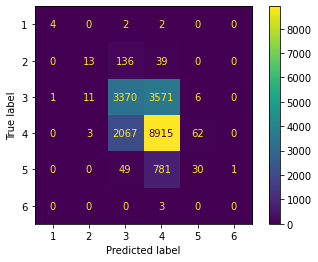

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2, X_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2, average='macro')

0.47609473251430584

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred2, average='micro')

0.6468058323717613

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred2, average='micro')

0.6468058323717613

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred2)

0.2756076820323782

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred2, average='micro')

0.6468058323717613

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X, y, cv=3)

In [ ]:
scores

array([0.63392183, 0.61626699, 0.62769071])

In [ ]:
for i in X_values:
  print(" "+i+",",end="")

 Dem_age, Dem_gender, Dem_edu, Dem_edu_mom, Dem_employment, Country, Dem_Expat, Dem_maritalstatus, Dem_dependents, Dem_riskgroup, Dem_isolation, Scale_SLON_1, Scale_SLON_2, Scale_SLON_3, OECD_people_1, OECD_people_2, OECD_insititutions_1, OECD_insititutions_2, OECD_insititutions_3, OECD_insititutions_4, OECD_insititutions_5, OECD_insititutions_6, Corona_concerns_1, Corona_concerns_2, Corona_concerns_3, Corona_concerns_4, Corona_concerns_5, Trust_countrymeasure, Compliance_1, Compliance_2, Compliance_3, Compliance_4, Compliance_5, Compliance_6, Expl_media_1, Expl_media_2, Expl_media_3, Expl_media_4, Expl_media_5, Expl_media_6, Avg_10-19, stringency_index, Avg_Coping,

Feature importance

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf2, X, y, n_repeats=10, random_state=0)

In [ ]:
l = list(result.importances_mean)
a = l.copy()
a.sort(reverse = True)
for i in range(5):
  print(l[l.index(a[i])], X_values[l.index(a[i])])

0.06856117824773418 Scale_SLON_2
0.036955563947633455 Avg_10-19
0.01565017623363546 Scale_SLON_3
0.013286757301107798 Corona_concerns_2
0.0117997860020141 stringency_index


To visualise decision tree

In [ ]:
pip install six

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.54529 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.54529 to fit



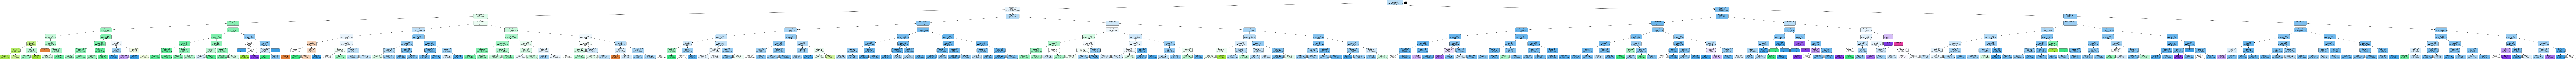

In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_values,class_names=['1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Covid_Dis.png')
Image(graph.create_png())

Decision tree in text format 

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

r = export_text(clf2, feature_names=X_values)

In [ ]:
print(r)

|--- Scale_SLON_2 <= 2.50
|   |--- Scale_SLON_3 <= 2.50
|   |   |--- stringency_index <= 35.67
|   |   |   |--- Scale_SLON_2 <= 1.50
|   |   |   |   |--- Scale_SLON_1 <= 1.50
|   |   |   |   |   |--- Corona_concerns_5 <= 3.50
|   |   |   |   |   |   |--- OECD_people_2 <= 6.50
|   |   |   |   |   |   |   |--- Compliance_6 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- Compliance_6 >  2.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- OECD_people_2 >  6.50
|   |   |   |   |   |   |   |--- Corona_concerns_2 <= 4.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- Corona_concerns_2 >  4.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- Corona_concerns_5 >  3.50
|   |   |   |   |   |   |--- Scale_SLON_3 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Scale_SLON_3 >  0.50
|   |   |   |   |   |   |   |--- OECD_people_1 <= 6.50
|   |   |   | 

# Decision Tree with normalisation and PCA

In [ ]:
X_2 = X
y_2 = y

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

X_2 = preprocessing.normalize(X_2)


In [ ]:
X_2

array([[0.47928064, 0.00704824, 0.        , ..., 0.53059186, 0.45154152,
        0.06475575],
       [0.49663119, 0.        , 0.01439511, ..., 0.370674  , 0.30808855,
        0.07152569],
       [0.24251465, 0.        , 0.01732247, ..., 0.68519049, 0.48770706,
        0.06550061],
       ...,
       [0.29561632, 0.00895807, 0.02687421, ..., 0.75203001, 0.39505837,
        0.06998492],
       [0.45306619, 0.00839011, 0.02517034, ..., 0.70435012, 0.37001104,
        0.0765598 ],
       [0.47239675, 0.        , 0.04143831, ..., 0.69574925, 0.36549281,
        0.07303502]])

In [ ]:
pca = PCA(n_components='mle', svd_solver = 'full')

In [ ]:
pca.fit(X_2)

PCA(n_components='mle', svd_solver='full')

In [ ]:
X_2.shape

(63552, 43)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=8)

In [ ]:
clf3 = clf3.fit(X_train_2,y_train_2)

In [ ]:
y_pred3 = clf3.predict(X_test_2)

Gave a lower accuracy than the normal-optimized one even with the same optimization. 

Accuracy of Decision Tree with PCA and normalisation = 0.6408266023287528

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred3))

Accuracy: 0.6408266023287528
